In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import linear_model
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
df=pd.read_csv('C:\\Users\\PMLS\\Downloads\\archive (1)\\diabetes_prediction_dataset.csv')
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.head())
print(df.shape)


(100000, 9)
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
(96146, 9)


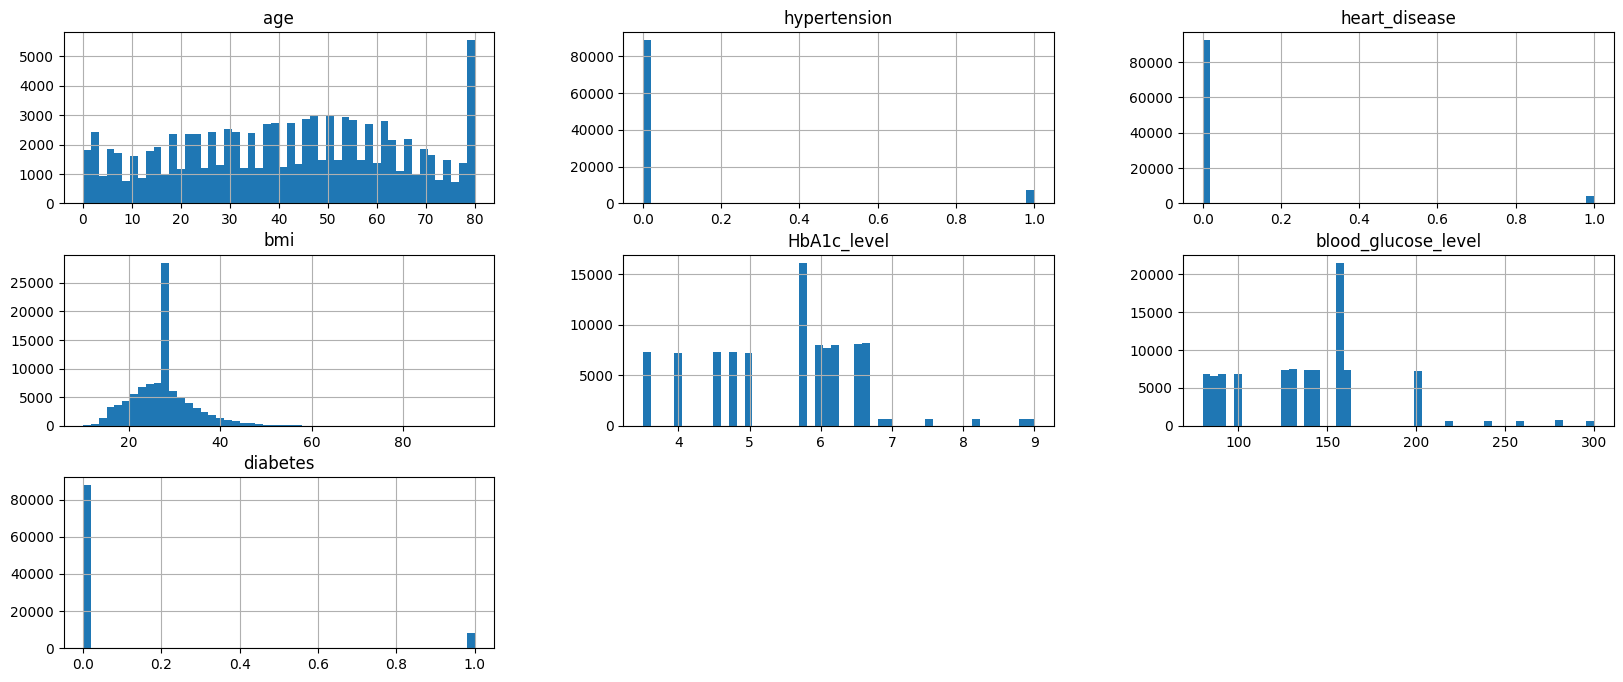

In [3]:
df.hist(bins=50,figsize=(20,8))
plt.show()

In [4]:
df1=pd.get_dummies(df)
df1.drop(['gender_Other','smoking_history_not current'],axis='columns',inplace=True)
y=df1['diabetes']
x=df1.drop('diabetes',axis=1)
print(df1.head())


    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   diabetes  gender_Female  gender_Male  smoking_history_No Info  \
0         0           True        False                    False   
1         0           True        False                     True   
2         0          False         True                    False   
3         0           True        False                    False   
4         0          False         True                    False   

   smoking_history_current  smoking_history_ever  smoking_history_former  \
0                    False  

In [5]:
df1.drop(['gender_Female','gender_Male'],axis='columns',inplace=True)


In [6]:
df1.drop(['smoking_history_No Info','smoking_history_current','smoking_history_ever'],axis='columns',inplace=True)


In [7]:
df1.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_former,smoking_history_never
0,80.0,0,1,25.19,6.6,140,0,False,True
1,54.0,0,0,27.32,6.6,80,0,False,False
2,28.0,0,0,27.32,5.7,158,0,False,True
3,36.0,0,0,23.45,5.0,155,0,False,False
4,76.0,1,1,20.14,4.8,155,0,False,False


In [8]:
y=df['diabetes']
x=df1
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=10)
model=linear_model.LinearRegression()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test[0:5])
print(Y_test[0:5])

print(y_pred)

27873    0
20178    1
21389    0
82240    0
31071    0
Name: diabetes, dtype: int64
[ 4.66743205e-15  1.00000000e+00 -1.73870588e-14 -6.87018284e-15
  2.18036494e-15]


In [9]:
print(model.score(X_train,Y_train))

1.0


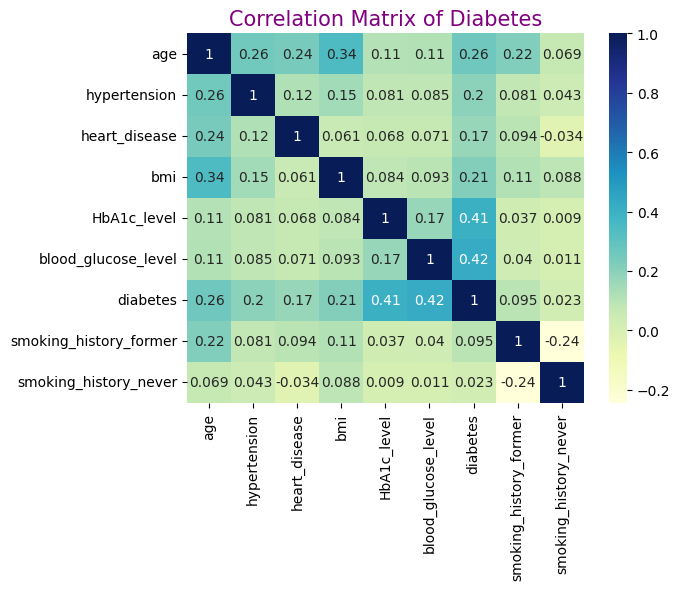

In [17]:
Corr=df1.corr()
sns.heatmap(Corr,annot=True,cmap='YlGnBu')
plt.title("Correlation Matrix of Diabetes",fontsize=15,color='purple')
plt.show()